# KNN – K-nearest neighbors

## Step 1 – KNN –classification 1

https://www.kaggle.com/datasets/cpluzshrijayan/milkquality

This dataset is manually collected from observations. It helps us to build machine learning models to predict the quality of milk. This dataset consists of 7 independent variables ie pH, Temperature, Taste, Odor, Fat, Turbidity, and Color.

Target Variable: (Grade) where Low (Bad), Medium (Moderate), High (Good)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, metrics
import math


In [2]:
df = pd.read_csv("milknew.csv")

In [3]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
df.shape

(1059, 8)

In [5]:
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [6]:
df.dtypes

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade          object
dtype: object

In [7]:
df['Grade'].unique()

array(['high', 'low', 'medium'], dtype=object)

In [8]:
# Ordinal categories with dictionary mapping

category_mapper = {'high': 2, 'medium': 1, 'low': 0}
df['Grade'] = df['Grade'].replace(category_mapper)

/var/folders/w8/j3wr4z1s5_sg0q1q5z7ccz9m0000gn/T/ipykernel_25568/3693522455.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Grade'] = df['Grade'].replace(category_mapper)


In [9]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


In [10]:
# Selecting features and targets here
X = df.drop(columns=['Grade'])
y = df['Grade']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Train the KNN Model

Will do KNN tuning using different k values and selects the one that gives the lowest prediction error.

Based on iterations, best k-value is this:
1


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=np.int64(1)))])

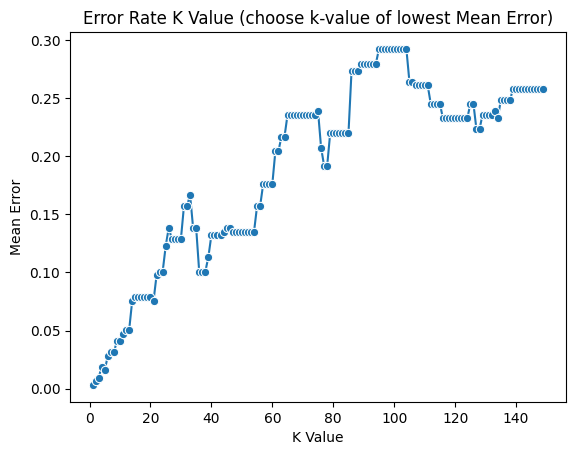

In [12]:
max_iterations = 150

# list to save the error values in the loop
error = []

# the default metric in scikit-learn
metric_selection = "minkowski"

# Calculating error for K values between 1 and 40
for i in range(1, max_iterations):

     # try with current k-value, train the model and make a test prediction
    knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=i, metric=metric_selection))
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)

    # save the error value for this k-value
    error.append(np.mean(pred_i != y_test))
    
# plot all the k-values and their error values
sns.lineplot(x=range(1, max_iterations), y=error, marker='o')
plt.title('Error Rate K Value (choose k-value of lowest Mean Error)')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# choose best k-value based on metrics
# we have to add +1 to k-value, since argmin() returns an index
# which starts from 0, but k-values start from 1
print("Based on iterations, best k-value is this:")
k_value = np.argmin(error) + 1
print(k_value)

# build the model with the optimal values
model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k_value, metric=metric_selection))
model.fit(X_train, y_train)

In [13]:
prediction = model.predict(X_test)
prediction_proba = model.predict_proba(X_test)
print(classification_report(y_test, prediction, target_names=category_mapper.keys()))

acc = accuracy_score(y_test, prediction)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

        high       1.00      0.99      1.00       115
      medium       1.00      1.00      1.00       127
         low       0.99      1.00      0.99        76

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318


Model overall accuracy: 99.69%


<Axes: >

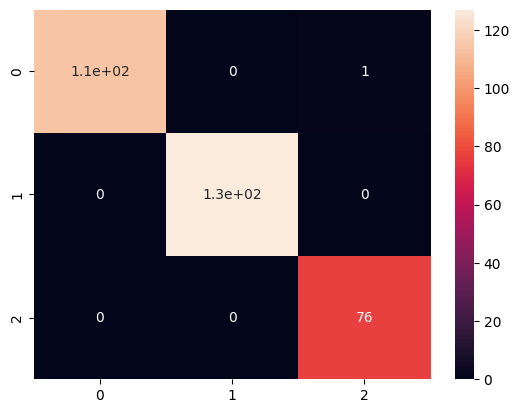

In [14]:
# Confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, prediction), annot=True)

In [15]:
# ROC-AUC -score

roc_auc_score(y_test, prediction_proba, multi_class='ovr')

np.float64(0.9978620194035214)

The KNN model performed exceptionally well on the milk quality dataset, achieving here an overall accuracy of 99.69%. All three classes (high, medium, low) had precision, recall, and F1-scores near or equal to 1.00,,

## Step 2 – KNN classification 2

For this part, considering the previous load dataset and compare the results with other KNN models

In [16]:
df_2 = pd.read_csv("loan_data.csv")

# cleanup and category conversion

df_2.person_gender =[1 if value == "male" else 0 for value in df_2.person_gender]
# ordinal categories
category_mapper = {'Doctorate': 4, 'Master': 3, 'Bachelor': 2, 'Associate': 1, 'High School': 0}
df_2['person_education'] = df_2['person_education'].map(category_mapper)

# convert binary categories
df_2.previous_loan_defaults_on_file =[1 if value == "Yes" else 0 for value in df_2.previous_loan_defaults_on_file]

# One-hot encode nominal variables
from sklearn.preprocessing import OneHotEncoder

variables = ['person_home_ownership', 'loan_intent']

# use encoder
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df_2[variables]).astype(int)
df_2 = pd.concat([df_2,one_hot_encoded],axis=1).drop(columns=variables)

df_2.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,3,71948.0,0,35000.0,16.02,0.49,3.0,561,...,0,0,0,1,0,0,0,0,1,0
1,21.0,0,0,12282.0,0,1000.0,11.14,0.08,2.0,504,...,0,0,1,0,0,1,0,0,0,0
2,25.0,0,0,12438.0,3,5500.0,12.87,0.44,3.0,635,...,1,0,0,0,0,0,0,1,0,0
3,23.0,0,2,79753.0,0,35000.0,15.23,0.44,2.0,675,...,0,0,0,1,0,0,0,1,0,0
4,24.0,1,3,66135.0,1,35000.0,14.27,0.53,4.0,586,...,0,0,0,1,0,0,0,1,0,0


In [17]:
# logistic regression model

# Prepare the model
y = df_2["loan_status"] # our target variable
X = df_2.drop(["loan_status"], axis=1) # our predictors

from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

from sklearn.linear_model import LogisticRegression

# Create logistic regression model
lr = LogisticRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = lr.predict(X_test)

# print the classification report based on true values and predictions
print(classification_report(y_test, y_pred))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, y_pred)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))
print("\n")

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     10493
           1       0.77      0.75      0.76      3007

    accuracy                           0.89     13500
   macro avg       0.85      0.84      0.85     13500
weighted avg       0.89      0.89      0.89     13500


Model overall accuracy: 89.43%




In [18]:
# SVC Model
model = make_pipeline(StandardScaler(), svm.SVC(probability=True))
model.fit(X_train, y_train)
# Get test predictions for evaluation metrics
predictions = model.predict(X_test)

# Classification metrics
# print the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))
print("\n")

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     10493
           1       0.85      0.76      0.80      3007

    accuracy                           0.91     13500
   macro avg       0.89      0.86      0.87     13500
weighted avg       0.91      0.91      0.91     13500


Model overall accuracy: 91.50%




In [19]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
# classification
model = make_pipeline(StandardScaler(), RandomForestClassifier())
model.fit(X_train, y_train)

# Get test predictions for evaluation metrics
predictions = model.predict(X_test)

# Classification metrics
# print the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))
print("\n")

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10493
           1       0.89      0.77      0.83      3007

    accuracy                           0.93     13500
   macro avg       0.91      0.87      0.89     13500
weighted avg       0.93      0.93      0.93     13500


Model overall accuracy: 92.79%




### KNN Model and Comparing Results

In [20]:
df_2.shape

(45000, 22)

In [21]:
df_sample = df_2.sample(3000, random_state=42)
df_sample.shape

(3000, 22)

In [22]:
y = df_sample["loan_status"] # our target variable
X = df_sample.drop(["loan_status"], axis=1) # our predictors

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Based on iterations, best k-value is this:
22


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=np.int64(22)))])

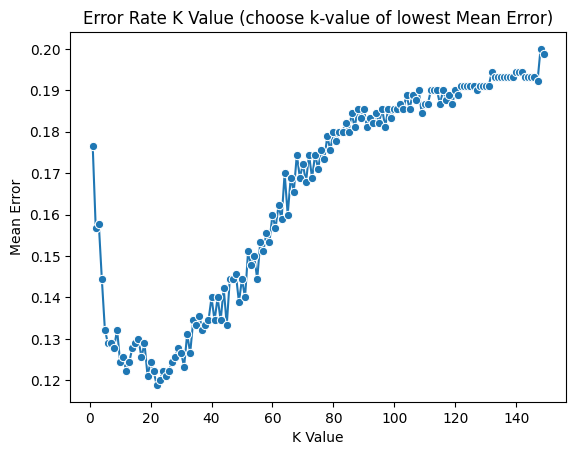

In [ ]:
max_iterations = 150 

# list to save the error values in the loop
error = []

# the default metric in scikit-learn
metric_selection = "minkowski"

# Calculating error for K values between 1 and 40
for i in range(1, max_iterations):

     # try with current k-value, train the model and make a test prediction
    knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=i, metric=metric_selection))
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)

    # save the error value for this k-value
    error.append(np.mean(pred_i != y_test))
    
# plot all the k-values and their error values
sns.lineplot(x=range(1, max_iterations), y=error, marker='o')
plt.title('Error Rate K Value (choose k-value of lowest Mean Error)')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# choose best k-value based on metrics
# we have to add +1 to k-value, since argmin() returns an index
# which starts from 0, but k-values start from 1
print("Based on iterations, best k-value is this:")
k_value = np.argmin(error) + 1
print(k_value)

# build the model with the optimal values
model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k_value, metric=metric_selection))
model.fit(X_train, y_train)

In [25]:
prediction = model.predict(X_test)
prediction_proba = model.predict_proba(X_test)
print(classification_report(y_test, prediction))

acc = accuracy_score(y_test, prediction)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       694
           1       0.86      0.57      0.69       206

    accuracy                           0.88       900
   macro avg       0.87      0.77      0.81       900
weighted avg       0.88      0.88      0.87       900


Model overall accuracy: 88.11%


### Compraison Betweeen Different Models:

| Model               | Accuracy   | 
| ------------------- | ---------- | 
| Logistic Regression | 89.43%     | 
| SVC                 | 91.50%     | 
| Random Forest       | 92.87% |
| KNN           | 88.11%     | 

KNN performed well (90% accuracy), maybe as we have taken sample of 3000 values from 45000 rows of data compared to SVC and Random Forest. Random Forest being as the best overall performer here, combining high precision, recall, and F1-score. KNN could be improved by tuning sample size and using a different metrics.


# Advance Task:

## Enhance KNN Model for the Loan Dataset

In [26]:
# GridCV might not work well with this but let's check 
# with different metrics and see if it gives better result

from sklearn.model_selection import GridSearchCV

param_grid = { 'kneighborsclassifier__n_neighbors': range(1, 31), 'kneighborsclassifier__weights': ['uniform', 'distance'], 'kneighborsclassifier__metric': ['euclidean', 'manhattan'] }

grid_search = GridSearchCV(make_pipeline(StandardScaler(), KNeighborsClassifier()), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__metric': ['euclidean',
                                                          'manhattan'],
                         'kneighborsclassifier__n_neighbors': range(1, 31),
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             scoring='accuracy')

In [27]:
grid_search.best_params_

{'kneighborsclassifier__metric': 'euclidean',
 'kneighborsclassifier__n_neighbors': 14,
 'kneighborsclassifier__weights': 'distance'}

In [28]:
model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=14, metric='euclidean', weights= 'distance'))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=14,
                                      weights='distance'))])

In [29]:
print(classification_report(y_test, prediction))

acc = accuracy_score(y_test, prediction)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       694
           1       0.86      0.57      0.69       206

    accuracy                           0.88       900
   macro avg       0.87      0.77      0.81       900
weighted avg       0.88      0.88      0.87       900


Model overall accuracy: 88.11%


GridSearchCV doesn't made that much difference here with different metrics or parameters. While KNN is easy to implement, it might not always be the best choice as we can see here, especially for large datasets. Algorithms like Random Forests or SVM often provide better performance and scalability.



## Using KNN regression

In [30]:
# load the data and cleaning process with categories convert and all
csv_path = "insurance.csv"
df_3 = pd.read_csv(csv_path)

# Using Dictionary Mapping for the smoker and sex columns
df_3['smoker'] = df_3['smoker'].map({"yes":1, "no":0})
df_3['sex'] = df_3['sex'].map({"male":1, "female":0})

# importing OneHotEncoder for coverting the categorical values for regions.
from sklearn.preprocessing import OneHotEncoder
variables = ['region']

# use encoder
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encodded= encoder.fit_transform(df_3[variables]).astype(int)
df_3= pd.concat([df_3, one_hot_encodded], axis=1).drop(columns=variables)

In [31]:
# First we do split between X and y.
X = df_3.drop("charges", axis=1)

# our target variable is y
y = df_3["charges"]

In [32]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [33]:
# Linear regression model.

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R-Squared:', metrics.r2_score(y_test, predictions))

Mean Absolute Error: 4145.4505556275935
Mean Squared Error: 33780509.57479168
Root Mean Squared Error: 5812.100272258874
R-Squared: 0.7696118054369008


In [34]:
# SVR Model

# Feature scaling is essential for SVR!
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = sc_y.fit_transform(y_test.values.reshape(-1, 1)).ravel()

# connect standard scaler for X-values
model = make_pipeline(StandardScaler(), svm.SVR())
model.fit(X_train_scaled, y_train_scaled)

predictions_scaled = model.predict(X_test_scaled)

# inverse transform predictions and true y as we predicted the model on scaled values
predictions = sc_y.inverse_transform(predictions_scaled.reshape(-1, 1))

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R-Squared:', metrics.r2_score(y_test, predictions))

Mean Absolute Error: 2151.9289815423995
Mean Squared Error: 21018755.940760996
Root Mean Squared Error: 4584.621679131332
R-Squared: 0.8566488991993187


In [35]:
# RandomForestRegressor Model

from sklearn.ensemble import RandomForestRegressor
regressor = make_pipeline(StandardScaler(), RandomForestRegressor())
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R-Squared:', metrics.r2_score(y_test, predictions))

Mean Absolute Error: 2544.9342199398016
Mean Squared Error: 21269600.77831143
Root Mean Squared Error: 4611.89774152804
R-Squared: 0.8549380993929758


In [36]:
# No Need to make this sample size smaller
df_3.shape

(1338, 10)

In [37]:
# Feature scaling
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = sc_y.fit_transform(y_test.values.reshape(-1, 1)).ravel()

In [38]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train_scaled)

predictions_scaled = knn.predict(X_test_scaled)

# inverse transform predictions and true y as we predicted the model on scaled values
predictions = sc_y.inverse_transform(predictions_scaled.reshape(-1, 1))

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R-Squared:', metrics.r2_score(y_test, predictions))


Mean Absolute Error: 3347.915483207706
Mean Squared Error: 29105656.815835305
Root Mean Squared Error: 5394.965877170615
R-Squared: 0.8014950097029491


The KNN Regressor achieved an R^2 score of 0.80 and an RMSE of around $5,395. While this is a reasonable result, it underperformed compared to other models like Random Forest and SVR.

Random Forest and SVR, being more flexible provided better overall performance for this problem. Still, KNN remains a useful model, especially when interpretability is preferred here.
